# Playing with CairoMakie

In [2]:
using DataFrames, MLJ, CairoMakie
X, y = @load_boston;
X = DataFrame(X)
y = Vector(y);

In [3]:
model = @load RidgeRegressor pkg=MLJLinearModels
pipe = @pipeline Standardizer model
m = machine(pipe, X, y)
fit!(m);

import MLJLinearModels ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jnovoa\.julia\packages\MLJModels\GKDnU\src\loading.jl:168
┌ Info: Training Machine{Pipeline276,…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403
┌ Info: Training Machine{RidgeRegressor,…}.
└ @ MLJBase C:\Users\jnovoa\.julia\packages\MLJBase\QXObv\src\machines.jl:403


In [4]:
yhat = predict(m);

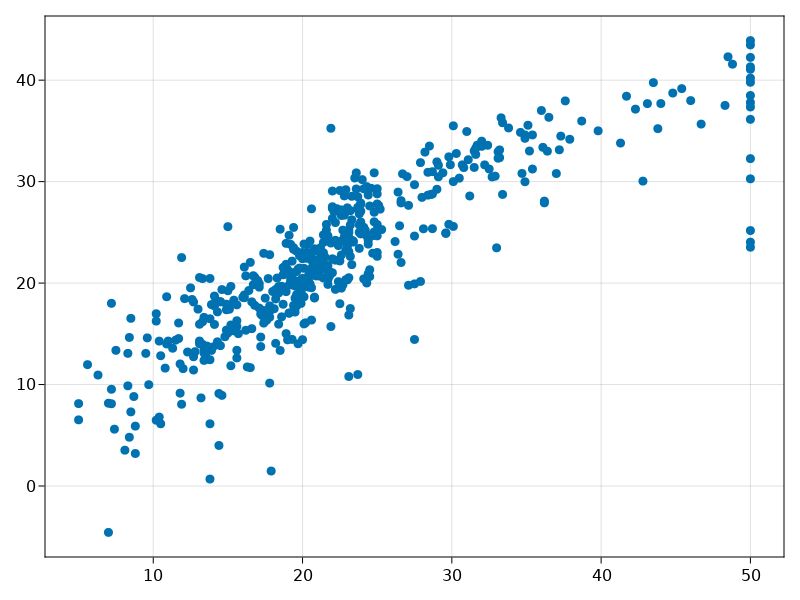

In [5]:
scatter(y, yhat)

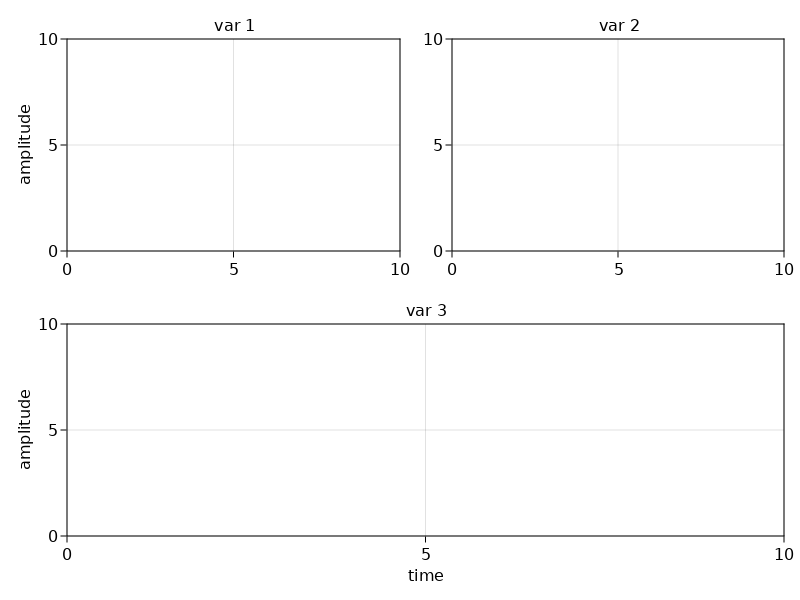

In [6]:
# Create figure axes
fig = Figure()
ax1 = Axis(fig[1, 1])
ax2 = Axis(fig[1, 2])
ax3 = Axis(fig[2, 1:2])

ax1.title = "var 1"
ax2.title = "var 2"
ax3.title = "var 3"

ax1.ylabel = "amplitude"
ax3.ylabel = "amplitude"
ax3.xlabel = "time"
fig

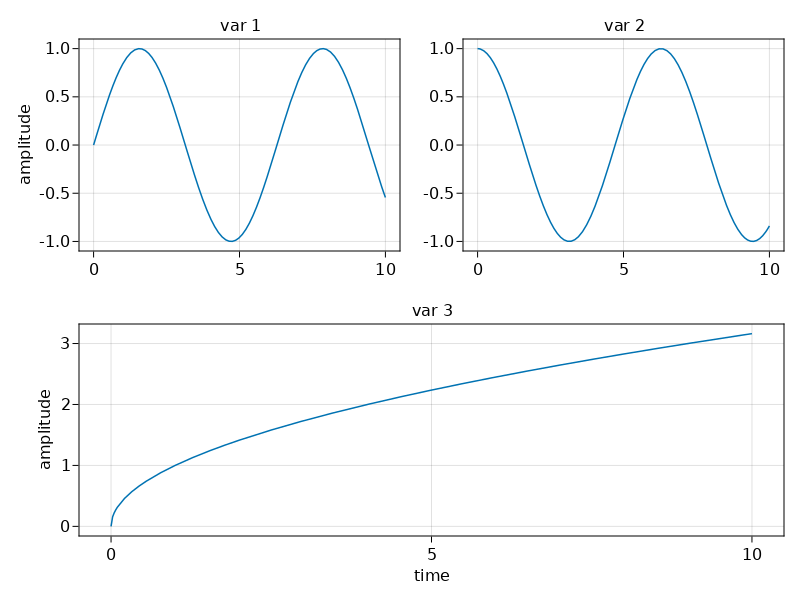

In [7]:
# plot into the empty axes
lines!(ax1, 0..10, sin)
lines!(ax2, 0..10, cos)
lines!(ax3, 0..10, sqrt)
fig

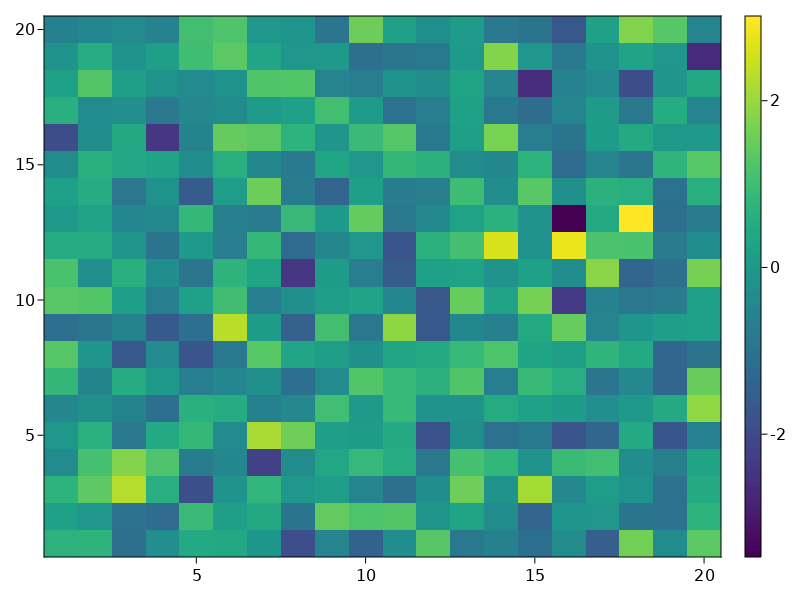

In [11]:
# heatmap
fig, ax, hm = heatmap(randn(20, 20))
Colorbar(fig[1, 2], hm)
fig